# Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [68]:
result = pd.read_csv("2017_jun_final.csv")
print(result)

         N                 Должность Язык.программирования Специализация  \
0        1        Junior QA engineer                   NaN     Manual QA   
1        2        Junior QA engineer                   NaN     Manual QA   
2        3         Software Engineer               C#/.NET           NaN   
3        4         Software Engineer            JavaScript           NaN   
4        5  Senior Software Engineer            JavaScript           NaN   
...    ...                       ...                   ...           ...   
8699  8700               QA engineer                   NaN     Manual QA   
8700  8701                 Marketing                   NaN           NaN   
8701  8702  Junior Software Engineer            Ruby/Rails           NaN   
8702  8703                 Team lead                   NaN           NaN   
8703  8704  Senior Software Engineer                  Java           NaN   

     Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0             


Прочитайте отриману таблицю, використовуючи метод head

In [69]:
result.head(3)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV


Визначте розмір таблиці за допомогою методу shape

In [70]:
result.shape

(8704, 25)

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [71]:
result.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [72]:
missed_data = result.isnull().sum(axis=0)
missed_data


N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [74]:
# Формуємо список колонок на видалення
# щоб в цей список не попала колонка 'Язык.программирования', тимчасово заповнюємо пусті поля символами "---"
result['Язык.программирования'] = result['Язык.программирования'].fillna("---")
missed_data = result.isnull().sum(axis=0)

missed_data_lst = list(missed_data[missed_data > 0].keys())

# Після того, як список сформовано - повертаємо для колонки "Язык.программирования" початкові значення колонок - NAN
result.replace("---", np.nan, inplace=True)

# Видаляємо колонки згідно нашого списку на видалення:
result.drop(columns=missed_data_lst, inplace=True)
result

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,средний,12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Киев,до 50 человек,Продуктовая,женский,22,Высшее,False,ниже среднего,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Днепр,свыше 1000 человек,Аутсорсинговая,мужской,34,Высшее,False,продвинутый,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [75]:
missed_data_1 = result.isnull().sum(axis=0)
missed_data_1

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [76]:
result.dropna(inplace=True)
result

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Киев,до 10 человек,Продуктовая,мужской,28,Высшее,False,выше среднего,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,8693,Software Engineer,Java,5,1,3500,650,Удаленно,до 200 человек,Аутсорсинговая,женский,28,Высшее,False,средний,12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500
8694,8695,Junior Software Engineer,C#/.NET,1,1,550,550,Харьков,до 200 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550
8695,8696,Software Engineer,Python,1,0.5,1500,1000,Киев,до 10 человек,Стартап,мужской,29,Высшее,False,средний,12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800


Визначте новий розмір таблиці за допомогою методу shape

In [77]:
result.shape

(4854, 20)

Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [78]:
python_data = result[result["Язык.программирования"] == "Python"]
python_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запорожье,до 50 человек,Аутсорсинговая,мужской,22,Незаконченное высшее,False,средний,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Киев,свыше 1000 человек,Аутсорсинговая,мужской,28,Среднее,False,средний,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,мужской,33,Высшее,False,выше среднего,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Киев,до 50 человек,Аутсорсинговая,мужской,22,Высшее,False,средний,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


Визначте розмір таблиці python_data за допомогою методу shape

In [79]:
python_data.shape

(207, 20)

Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [80]:
python_data_1 = python_data.groupby("Должность", as_index=False)
python_data_1


Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [81]:
salary = python_data_1.agg({'Зарплата.в.месяц': (np.min, np.max)})
salary

Должность Зарплата.в.месяц      
                                         min   max
0  Junior Software Engineer              100  1250
1  Senior Software Engineer             1300  9200
2         Software Engineer              500  5400
3          System Architect             3000  5000
4            Technical Lead             1425  6200

Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [82]:
def fill_avg_salary(row):
  min_salary = row['Зарплата.в.месяц']['min']
  max_salary = row['Зарплата.в.месяц']['max']
  return np.average([min_salary, max_salary])

# За допомогою методу apply() застосовуємо функцію fill_avg_salary() до кожної стрічки таблиці.
# Тобто, для кожної стрічки визначаємо середню зарплату та записуємо ці дані в новий стовбець:
salary['avg'] = salary.apply(fill_avg_salary, axis=1)

# Відсортуємо дані середньої заробітної плати від більшої до меньшої:
salary.sort_values('avg', ascending=False)

Должность Зарплата.в.месяц           avg
                                         min   max        
1  Senior Software Engineer             1300  9200  5250.0
3          System Architect             3000  5000  4000.0
4            Technical Lead             1425  6200  3812.5
2         Software Engineer              500  5400  2950.0
0  Junior Software Engineer              100  1250   675.0

Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [83]:
salary_info = salary['avg'].describe()
salary_info

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64













Збережіть отриману таблицю в CSV файл

In [84]:
salary.to_csv("salary.csv", index=False)

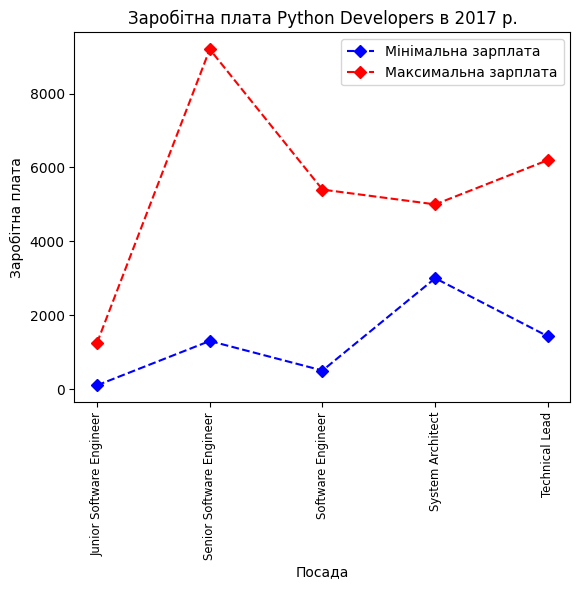

In [104]:
plt.plot(salary['Должность'], 
         salary['Зарплата.в.месяц']['min'], 
         label="Мінімальна зарплата", 
         color='b',
         linestyle = '--',
         marker = 'D')
plt.plot(salary['Должность'], 
         salary['Зарплата.в.месяц']['max'], 
         label="Максимальна зарплата", 
         color='r',
         linestyle = '--',
         marker = 'D',)

plt.xlabel("Посада")
plt.ylabel("Заробітна плата")
plt.xticks(rotation=90, fontsize='small')
plt.title("Заробітна плата Python Developers в 2017 р.")
plt.legend()
plt.show()